# Inspect Launceston data

Match to footprint and generate cleaned (unique match) dataset

Prepare DEM

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#Floor height file
filepath = '/Users/Fangyuan/FrontierSI/Projects - Documents/Projects - Data Analytics/127 Residential Dwelling Floor Height/4 Executing/GA_data_documentation/Launceston Exposure Data/LC_Final.zip'

In [4]:
df = gpd.read_file(filepath)
df.head()

,EASTING,NORTHING,UFI,ZONE,DEM,LID,ADDRESS,SUBURB,POSTCODE,FEATURE_NA,NEXIS_CAD_,NEXIS_CAD1,SA1_CODE,SA2_CODE,LGA_CODE_2,MB_CODE_20,GCC_CODE_2,SETTLEMENT,LOCAL_USE,NEXIS_USE_,NEXIS_USE1,ABS_BusReg,Survey_Res,Survey_COM,Survey_Grd,Survey_G_1,Survey_Bas,Survey_Gar,Survey_Par,Survey_Chi,Survey_C_1,Survey_Gab,NEXIS_CONS,NEXIS_BLOC,LOCAL_FOOT,NEXIS_FOOT,SA1,USE,NEXIS_FLOO,LOCAL_YEAR,NEXIS_YEAR,LOCAL_ROOF,NEXIS_ROOF,Survey_Roo,LOCAL_WALL,NEXIS_WALL,Survey_Wal,Survey_Nr_,Survey_C_2,Survey_Ind,Vulnerabil,NEXIS_NO_1,RENAISSA0,RENAISSA1,LCC_TYPE,Area_m,Count_,Min_OBJECT,LCC_FLOOR,check1,POINT_X_1,POINT_Y_1,ROWS,SA11,GVULN,GVULV,geometry
0,510962.988188,5.412541e+06,1002,15.0 Urban Mixed Use,2.697813,GNAF_GATAS702308914,13 PARK STREET,LAUNCESTON,7250,None,1115908_510965_5412541_55,0.0,6.020110e+10,602011038.0,64010.0,6.008413e+10,0.0,Large Town,C33 - Restaurant,Commercial,Commercial,0.0,0.0,Restaurant,2.7,RTF,0.0,0.0,N,0.0,0,N,47_LBM_C,586.680883,144.053207,144.053207,6.020110e+10,Commercial,792.292641,1933.0,1914 - 1946,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,4-7,Hallams Waterfront CafÚ / Restaurant,None,bldwb,143.812555,3.0,1061.0,3.12,0.0,147.131228,-41.438625,1.0,6.020110e+10,4.0,10.0,POINT (510962.988 5412541.233)
1,511021.688427,5.412248e+06,33,11.0 Inner Residential,4.208417,GNAF_GATAS702204375,293 BRISBANE STREET,LAUNCESTON,7250,None,119421_511025_5412241_55,0.0,6.020110e+10,602011038.0,64010.0,6.008621e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,3.0,RTF,0.0,0.0,no,2.0,Medium,no,SH,530.865816,187.958099,187.958099,6.020110e+10,Residential,187.958099,1910.0,1891 - 1913,GI - Galvanised Iron,Metal Sheeting,Metal Sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,1,None,None,hsewb,188.125772,0.0,0.0,3.33,0.0,147.131936,-41.441268,1.0,6.020110e+10,4.0,10.0,POINT (511021.688 5412247.723)
2,511082.136711,5.412226e+06,31,11.0 Inner Residential,4.540370,GNAF_GATAS702478623,4 MIDDLE STREET,LAUNCESTON,7250,None,1197621_511081_5412234_55,0.0,6.020110e+10,602011038.0,64010.0,6.008621e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,2.4,RTF,0.0,0.0,N,2.0,M,N,SH,454.871888,87.892159,87.892159,6.020110e+10,Residential,87.892159,1890.0,1840 - 1890,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,1,None,None,hsewb,88.351616,0.0,0.0,3.70,0.0,147.132660,-41.441464,1.0,6.020110e+10,4.0,10.0,POINT (511082.137 5412225.871)
3,511068.760790,5.412219e+06,28,11.0 Inner Residential,5.212643,GNAF_GATAS702296648,6 MIDDLE STREET,LAUNCESTON,7250,None,628416_511066_5412229_55,0.0,6.020110e+10,602011038.0,64010.0,6.008621e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,2.7,RTF,0.0,0.0,N,3.0,M,N,SH,497.686200,167.682205,167.682205,6.020110e+10,Residential,167.682205,1900.0,1891 - 1913,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,1,None,None,hse,167.439675,0.0,0.0,3.37,0.0,147.132500,-41.441522,1.0,6.020110e+10,4.0,10.0,POINT (511068.761 5412219.452)
4,511048.726805,5.412229e+06,26,11.0 Inner Residential,5.162260,GNAF_GATAS702290011,8 MIDDLE STREET,LAUNCESTON,7250,None,1202407_511049_5412227_55,0.0,6.020110e+10,602011038.0,64010.0,6.008621e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,2.7,RTF,0.0,0.0,N,2.0,M,N,SH,293.477468,95.055771,95.055771,6.020110e+10,Residential,95.055771,1880.0,1840 - 1890,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,1,None,None,hse,95.223500,0.0,0.0,3.37,0.0,147.132260,-41.441433,1.0,6.020110e+10,4.0,10.0,POINT (511048.727 5412229.364)


In [5]:
df.columns

Index(['EASTING', 'NORTHING', 'UFI', 'ZONE', 'DEM', 'LID', 'ADDRESS', 'SUBURB',
       'POSTCODE', 'FEATURE_NA', 'NEXIS_CAD_', 'NEXIS_CAD1', 'SA1_CODE',
       'SA2_CODE', 'LGA_CODE_2', 'MB_CODE_20', 'GCC_CODE_2', 'SETTLEMENT',
       'LOCAL_USE', 'NEXIS_USE_', 'NEXIS_USE1', 'ABS_BusReg', 'Survey_Res',
       'Survey_COM', 'Survey_Grd', 'Survey_G_1', 'Survey_Bas', 'Survey_Gar',
       'Survey_Par', 'Survey_Chi', 'Survey_C_1', 'Survey_Gab', 'NEXIS_CONS',
       'NEXIS_BLOC', 'LOCAL_FOOT', 'NEXIS_FOOT', 'SA1', 'USE', 'NEXIS_FLOO',
       'LOCAL_YEAR', 'NEXIS_YEAR', 'LOCAL_ROOF', 'NEXIS_ROOF', 'Survey_Roo',
       'LOCAL_WALL', 'NEXIS_WALL', 'Survey_Wal', 'Survey_Nr_', 'Survey_C_2',
       'Survey_Ind', 'Vulnerabil', 'NEXIS_NO_1', 'RENAISSA0', 'RENAISSA1',
       'LCC_TYPE', 'Area_m', 'Count_', 'Min_OBJECT', 'LCC_FLOOR', 'check1',
       'POINT_X_1', 'POINT_Y_1', 'ROWS', 'SA11', 'GVULN', 'GVULV', 'geometry'],
      dtype='object')

In [6]:
df.select_dtypes(exclude=[float, int]).describe(include='all')

,ZONE,LID,ADDRESS,SUBURB,POSTCODE,FEATURE_NA,NEXIS_CAD_,SETTLEMENT,LOCAL_USE,NEXIS_USE_,NEXIS_USE1,Survey_COM,Survey_G_1,Survey_Par,Survey_C_1,Survey_Gab,NEXIS_CONS,USE,NEXIS_YEAR,LOCAL_ROOF,NEXIS_ROOF,Survey_Roo,LOCAL_WALL,NEXIS_WALL,Survey_Wal,Survey_C_2,Survey_Ind,NEXIS_NO_1,RENAISSA0,RENAISSA1,LCC_TYPE,geometry
count,1276,1276,1276,1276,1276,54,1276,1276,1276,1276,1276,424,1265,1266,1159,1266,1276,1276,1276,1221,1237,1274,1215,1230,1276,106,278,1276,287,245,1221,1276
unique,13,1276,1158,4,2,50,1126,1,41,5,3,76,5,6,8,7,25,3,14,9,4,6,27,7,9,9,14,4,239,38,47,1276
top,11.0 Inner Residential,GNAF_GATAS702308914,103 HOLBROOK STREET,INVERMAY,7248,SERVICE STATION,1162225_511126_5414129_55,Large Town,R1 - House or Cottage,Large Town,Residential,Retail,RTF,N,0,N,SH,Residential,1914 - 1946,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,WB - Weatherboard,Timber,Weatherboard,13_LBM_T,ISS_SS_S,1,Residential,Warehouse,hsewb,POINT (510962.98818814504 5412541.233367113)
freq,548,1,17,963,1006,4,17,1276,662,848,845,109,722,605,529,601,687,845,380,967,1152,644,571,578,606,41,164,799,32,97,521,1


In [7]:
df.LCC_TYPE.unique()

array(['bldwb', 'hsewb', 'hse', None, 'bldbkwb', 'bldbkCHU', 'notype',
       'bld', 'hsebk', 'House', 'bldwbHALL', 'bldcon', 'bldbk',
       'Building', 'bldbkbrd', 'bldgi', 'Res', 'bldbkHOTEL', 's', 'house',
       'garage', 'gar', 'shed', 'bldtim', 'shd', 'bldbkgi', 'bldfib',
       'Units', 'hseren', 'hsebkbrd', 'bldren', 'Structure', 'building',
       'bldbkSERVO', 'hsewbbk', 'hsebkHIST', 'hsecon', 'bldal', 'rfd',
       'Shed', 'bldwbHE', 'bldbkGVT', 'bldconHOTEL', 'bldcongi', 'Com',
       'hsesto', 'bldwbCHU', 'bldgiES'], dtype=object)

In [8]:
# Roof type, Wall type, Commercial construction type, Industrial construction type
df.Survey_Roo.value_counts(), df.Survey_Wal.value_counts(), df.Survey_C_2.value_counts(), df.Survey_Ind.value_counts()

(Survey_Roo
 Metal sheeting     644
 Metal Sheeting     568
 Tiles               48
 Fibre cement         6
 Imitation tiles      4
 Imitation tile       4
 Name: count, dtype: int64,
 Survey_Wal
 Weatherboard        606
 Cavity Brick        282
 Metal sheeting       99
 Metal Sheeting       85
 Veneer masonry       83
 Fibre cement         79
 Precast Concrete     31
 Precast concrete      6
 Cavity brick          5
 Name: count, dtype: int64,
 Survey_C_2
 13_LBM_T       41
 13_LBM_C       17
 13_S_URM       13
 13_LBM_S       11
 13_C_URM        7
 13_C_O          7
 13_S_O          7
 ISS_SSURM_S     2
 47_C_O          1
 Name: count, dtype: int64,
 Survey_Ind
 ISS_SS_S      164
 ISS_URM_PS     46
 ISS_PC_S       28
 ISS_URM_S      22
 1SS_URM_S       4
 ISS_CURM_S      3
 ISS_RM_S        2
 13_LBM_S        2
 IDS_CURM_S      2
 1SS_SS_S        1
 1SS_PC-S        1
 ISS_SPS_S       1
 1SS-SS_S        1
 ISS_SSPC_S      1
 Name: count, dtype: int64)

In [9]:
df_r = df[df.USE=='Residential']
df_r.Survey_Roo.value_counts(), df_r.Survey_Wal.value_counts(), df_r.Survey_C_2.value_counts(), df_r.Survey_Ind.value_counts()

(Survey_Roo
 Metal Sheeting     417
 Metal sheeting     378
 Tiles               40
 Imitation tiles      4
 Imitation tile       4
 Fibre cement         1
 Name: count, dtype: int64,
 Survey_Wal
 Weatherboard        583
 Cavity Brick        103
 Veneer masonry       78
 Fibre cement         72
 Cavity brick          5
 Metal sheeting        2
 Metal Sheeting        1
 Precast concrete      1
 Name: count, dtype: int64,
 Survey_C_2
 13_C_URM    1
 Name: count, dtype: int64,
 Survey_Ind
 1SS_SS_S    1
 ISS_PC_S    1
 Name: count, dtype: int64)

In [10]:
df_r.select_dtypes(exclude=[float, int]).describe(include='all')

,ZONE,LID,ADDRESS,SUBURB,POSTCODE,FEATURE_NA,NEXIS_CAD_,SETTLEMENT,LOCAL_USE,NEXIS_USE_,NEXIS_USE1,Survey_COM,Survey_G_1,Survey_Par,Survey_C_1,Survey_Gab,NEXIS_CONS,USE,NEXIS_YEAR,LOCAL_ROOF,NEXIS_ROOF,Survey_Roo,LOCAL_WALL,NEXIS_WALL,Survey_Wal,Survey_C_2,Survey_Ind,NEXIS_NO_1,RENAISSA0,RENAISSA1,LCC_TYPE,geometry
count,845,845,845,845,845,1,845,845,845,845,845,3,841,841,792,841,845,845,845,836,845,844,836,845,845,1,2,845,41,46,818,845
unique,8,845,759,4,2,1,731,1,12,3,1,3,4,4,8,7,8,1,14,8,4,6,19,6,8,1,2,3,14,9,27,845
top,11.0 Inner Residential,GNAF_GATAS702204375,103 HOLBROOK STREET,INVERMAY,7248,GLEBE COTTAGES,1162225_511126_5414129_55,Large Town,R1 - House or Cottage,Large Town,Residential,shed,RTF,no,Medium,N,SH,Residential,1914 - 1946,GI - Galvanised Iron,Metal Sheeting,Metal Sheeting,WB - Weatherboard,Timber,Weatherboard,13_C_URM,1SS_SS_S,1,Residential,Residential,hsewb,POINT (511021.68842682184 5412247.7228073785)
freq,520,1,17,711,723,1,17,845,658,840,845,1,690,437,227,355,681,845,323,709,785,417,544,551,583,1,1,792,28,22,513,1


In [11]:
#Foundation type
# Rubble Trench Footings (RTF), Slab-on-grade (SOG), Timber Frame
df_r.Survey_G_1.value_counts()

Survey_G_1
RTF              690
SoG              125
Timber            25
Slab-on-grade      1
Name: count, dtype: int64

In [12]:
df_r.select_dtypes(include=[float, int]).describe(include='all')

,EASTING,NORTHING,UFI,DEM,NEXIS_CAD1,SA1_CODE,SA2_CODE,LGA_CODE_2,MB_CODE_20,GCC_CODE_2,ABS_BusReg,Survey_Res,Survey_Grd,Survey_Bas,Survey_Gar,Survey_Chi,NEXIS_BLOC,LOCAL_FOOT,NEXIS_FOOT,SA1,NEXIS_FLOO,LOCAL_YEAR,Survey_Nr_,Vulnerabil,Area_m,Count_,Min_OBJECT,LCC_FLOOR,check1,POINT_X_1,POINT_Y_1,ROWS,SA11,GVULN,GVULV
count,845.000000,8.450000e+02,845.000000,845.000000,845.0,8.450000e+02,8.450000e+02,845.000000,8.450000e+02,845.0,845.0,845.0,845.000000,845.0,845.000000,845.000000,845.000000,845.000000,845.000000,8.450000e+02,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.0,8.450000e+02,845.000000,845.000000
mean,511245.083106,5.414067e+06,499.650888,2.153322,0.0,6.020110e+10,6.020110e+08,64046.213018,6.008561e+10,0.0,0.0,0.0,2.730296,0.0,0.026036,1.092308,794.167518,125.975214,128.465066,6.020110e+10,140.465520,1925.475740,1.075740,3.540828,129.330797,3.246154,579.463905,2.552947,-2.486391,147.134576,-41.424876,1.0,6.020110e+10,3.005917,9.005917
std,436.555948,6.717028e+02,265.792373,1.014622,0.0,1.955907e+02,1.951264e+00,252.878878,3.904516e+06,0.0,0.0,0.0,0.321291,0.0,0.216136,0.918994,1084.734483,88.693549,74.750421,1.955907e+02,141.410311,32.226074,0.269176,4.376781,67.800426,48.533479,496.457544,1.043111,36.689537,0.005225,0.006050,0.0,1.955907e+02,0.959469,0.959469
min,509567.027913,5.412154e+06,4.000000,0.631327,0.0,6.020110e+10,6.020110e+08,64010.000000,6.008073e+10,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,99.434444,0.000000,39.420181,6.020110e+10,39.420181,1840.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-320.000000,147.114491,-41.442105,1.0,6.020110e+10,1.000000,7.000000
25%,511044.383802,5.413627e+06,276.000000,1.335472,0.0,6.020110e+10,6.020110e+08,64010.000000,6.008351e+10,0.0,0.0,0.0,2.700000,0.0,0.000000,0.000000,371.427639,99.538109,100.648102,6.020110e+10,101.788803,1900.000000,1.000000,1.000000,100.759004,1.000000,98.000000,1.920000,0.000000,147.132174,-41.428840,1.0,6.020110e+10,3.000000,9.000000
50%,511211.092483,5.414097e+06,503.000000,1.606960,0.0,6.020110e+10,6.020110e+08,64010.000000,6.008503e+10,0.0,0.0,0.0,2.700000,0.0,0.000000,1.000000,481.094767,115.403603,116.123596,6.020110e+10,118.079201,1920.000000,1.000000,1.000000,116.010794,1.000000,498.000000,2.130000,0.000000,147.134166,-41.424613,1.0,6.020110e+10,3.000000,9.000000
75%,511426.412399,5.414451e+06,720.000000,3.072500,0.0,6.020110e+10,6.020110e+08,64010.000000,6.008774e+10,0.0,0.0,0.0,3.000000,0.0,0.000000,2.000000,660.792700,136.313202,137.318207,6.020110e+10,139.524704,1934.000000,1.000000,6.000000,137.805608,1.000000,931.000000,3.350000,0.000000,147.136757,-41.421420,1.0,6.020110e+10,3.000000,9.000000
max,512812.172319,5.415661e+06,1378.000000,5.212643,0.0,6.020110e+10,6.020110e+08,65810.000000,6.010782e+10,0.0,0.0,0.0,4.800000,0.0,3.000000,6.000000,6453.753106,1707.642944,1480.000000,6.020110e+10,2960.000000,2008.000000,2.000000,23.000000,1022.484983,999.000000,1879.000000,7.180000,379.000000,147.153346,-41.410525,1.0,6.020110e+10,6.000000,12.000000


In [13]:
df_r[df_r.LCC_FLOOR>0]

,EASTING,NORTHING,UFI,ZONE,DEM,LID,ADDRESS,SUBURB,POSTCODE,FEATURE_NA,NEXIS_CAD_,NEXIS_CAD1,SA1_CODE,SA2_CODE,LGA_CODE_2,MB_CODE_20,GCC_CODE_2,SETTLEMENT,LOCAL_USE,NEXIS_USE_,NEXIS_USE1,ABS_BusReg,Survey_Res,Survey_COM,Survey_Grd,Survey_G_1,Survey_Bas,Survey_Gar,Survey_Par,Survey_Chi,Survey_C_1,Survey_Gab,NEXIS_CONS,NEXIS_BLOC,LOCAL_FOOT,NEXIS_FOOT,SA1,USE,NEXIS_FLOO,LOCAL_YEAR,NEXIS_YEAR,LOCAL_ROOF,NEXIS_ROOF,Survey_Roo,LOCAL_WALL,NEXIS_WALL,Survey_Wal,Survey_Nr_,Survey_C_2,Survey_Ind,Vulnerabil,NEXIS_NO_1,RENAISSA0,RENAISSA1,LCC_TYPE,Area_m,Count_,Min_OBJECT,LCC_FLOOR,check1,POINT_X_1,POINT_Y_1,ROWS,SA11,GVULN,GVULV,geometry
1,511021.688427,5.412248e+06,33,11.0 Inner Residential,4.208417,GNAF_GATAS702204375,293 BRISBANE STREET,LAUNCESTON,7250,None,119421_511025_5412241_55,0.0,6.020110e+10,602011038.0,64010.0,6.008621e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,3.0,RTF,0.0,0.0,no,2.0,Medium,no,SH,530.865816,187.958099,187.958099,6.020110e+10,Residential,187.958099,1910.0,1891 - 1913,GI - Galvanised Iron,Metal Sheeting,Metal Sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,1,None,None,hsewb,188.125772,0.0,0.0,3.33,0.0,147.131936,-41.441268,1.0,6.020110e+10,4.0,10.0,POINT (511021.688 5412247.723)
2,511082.136711,5.412226e+06,31,11.0 Inner Residential,4.540370,GNAF_GATAS702478623,4 MIDDLE STREET,LAUNCESTON,7250,None,1197621_511081_5412234_55,0.0,6.020110e+10,602011038.0,64010.0,6.008621e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,2.4,RTF,0.0,0.0,N,2.0,M,N,SH,454.871888,87.892159,87.892159,6.020110e+10,Residential,87.892159,1890.0,1840 - 1890,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,1,None,None,hsewb,88.351616,0.0,0.0,3.70,0.0,147.132660,-41.441464,1.0,6.020110e+10,4.0,10.0,POINT (511082.137 5412225.871)
3,511068.760790,5.412219e+06,28,11.0 Inner Residential,5.212643,GNAF_GATAS702296648,6 MIDDLE STREET,LAUNCESTON,7250,None,628416_511066_5412229_55,0.0,6.020110e+10,602011038.0,64010.0,6.008621e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,2.7,RTF,0.0,0.0,N,3.0,M,N,SH,497.686200,167.682205,167.682205,6.020110e+10,Residential,167.682205,1900.0,1891 - 1913,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,1,None,None,hse,167.439675,0.0,0.0,3.37,0.0,147.132500,-41.441522,1.0,6.020110e+10,4.0,10.0,POINT (511068.761 5412219.452)
4,511048.726805,5.412229e+06,26,11.0 Inner Residential,5.162260,GNAF_GATAS702290011,8 MIDDLE STREET,LAUNCESTON,7250,None,1202407_511049_5412227_55,0.0,6.020110e+10,602011038.0,64010.0,6.008621e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,2.7,RTF,0.0,0.0,N,2.0,M,N,SH,293.477468,95.055771,95.055771,6.020110e+10,Residential,95.055771,1880.0,1840 - 1890,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,1,None,None,hse,95.223500,0.0,0.0,3.37,0.0,147.132260,-41.441433,1.0,6.020110e+10,4.0,10.0,POINT (511048.727 5412229.364)
5,511049.189444,5.412259e+06,1184,11.0 Inner Residential,3.174608,GNAF_GATAS702473185,285 BRISBANE STREET,LAUNCESTON,7250,None,520910_511049_5412258_55,0.0,6.020110e+10,602011038.0,64010.0,6.008621e+10,0.0,Large Town,I10 - Manufacturing Workshop,Industrial,Residential,0.0,0.0,None,2.4,RTF,0.0,0.0,N,0.0,0,Y,IDS_CURM_S,463.554207,0.000000,232.000000,6.020110e+10,Residential,464.000000,1900.0,1891 - 1913,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,1-3,None,None,None,523.935719,0.0,0.0,3.33,-232.0,147.132265,-41.441168,1.0,6.020110e+10,4.0,10.0,POINT (511049.189 5412258.783)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

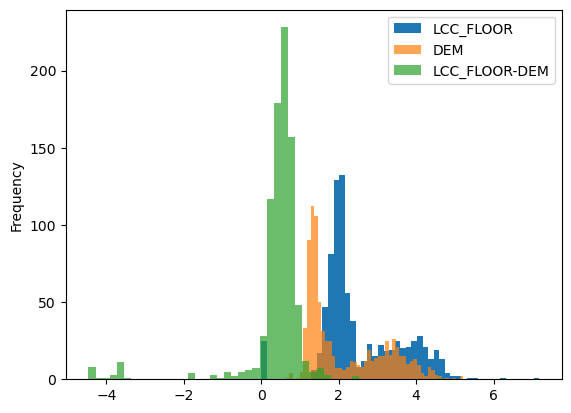

In [14]:
df_r.LCC_FLOOR.plot.hist(bins=50, label='LCC_FLOOR')
df_r.DEM.plot.hist(bins=50, label='DEM', alpha=0.7)
(df_r.LCC_FLOOR-df_r.DEM).plot.hist(bins=50, alpha=0.7, label='LCC_FLOOR-DEM')
plt.legend()

<Axes: ylabel='Frequency'>

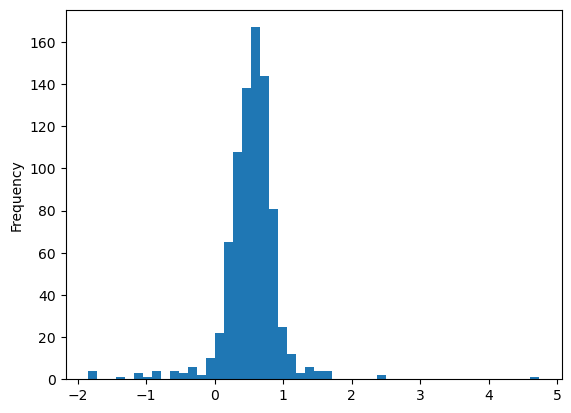

In [15]:
(df_r[df_r.LCC_FLOOR>0].LCC_FLOOR-df_r[df_r.LCC_FLOOR>0].DEM).plot.hist(bins=50)

/Users/Fangyuan/miniconda/envs/geo/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


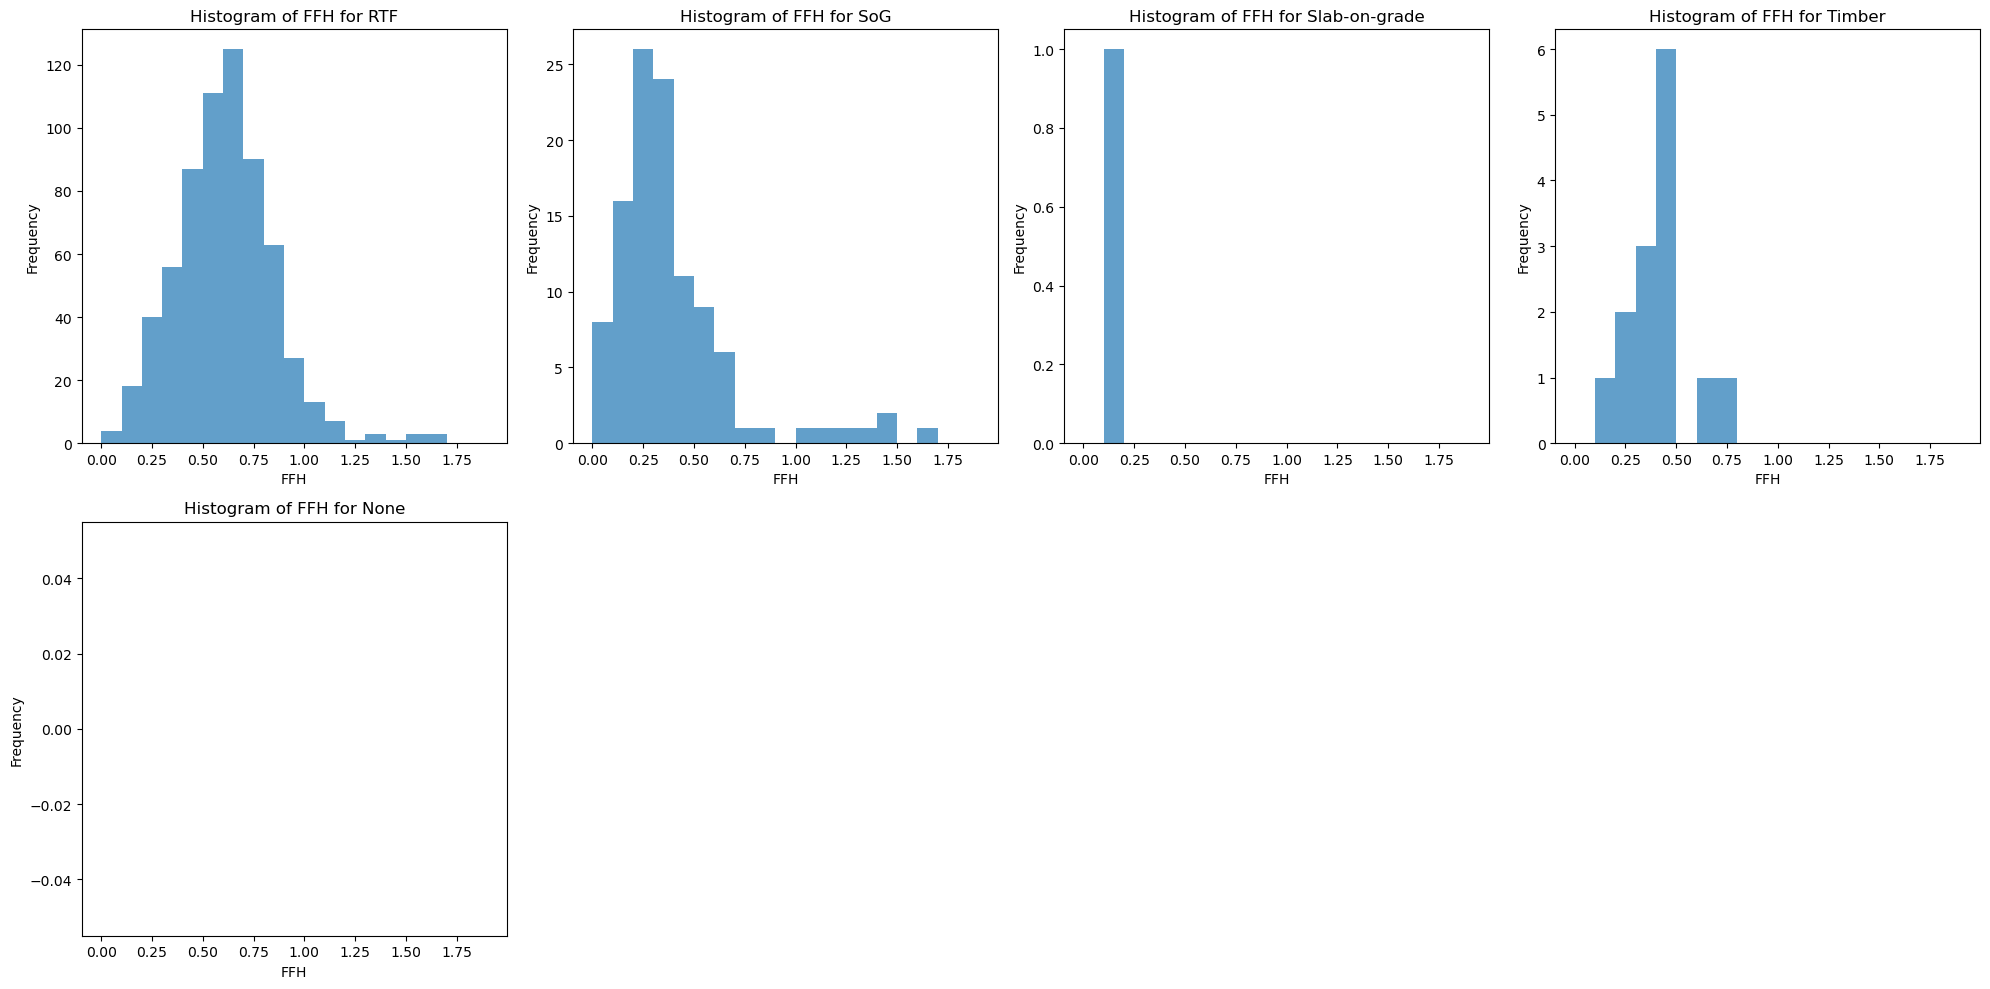

In [16]:
# Distribution of Floor Height per foundation type

df_r['FFH'] = (df_r.LCC_FLOOR-df_r.DEM)

def plot_histograms_by_build_type(df_r, type_col='Survey_G_1', ffh_col='FFH'):
    # Create a 4-column grid for the subplots
    unique_build_types = df_r[type_col].unique()
    num_build_types = len(unique_build_types)

    fig, axes = plt.subplots(nrows=(num_build_types + 3) // 4, ncols=4, figsize=(20, 5 * ((num_build_types + 3) // 4)))
    axes = axes.flatten()

    for ax, build_type in zip(axes, unique_build_types):
        group = df_r[df_r[type_col] == build_type]
        ax.hist(group[ffh_col][group[ffh_col]>=0], bins=np.arange(0,2,0.1), alpha=0.7)
        ax.set_title(f'Histogram of FFH for {build_type}')
        ax.set_xlabel(ffh_col)
        ax.set_ylabel('Frequency')

    # Hide any unused subplots
    for i in range(len(unique_build_types), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Example usage
plot_histograms_by_build_type(df_r)


## Matching with building footprint

In [19]:
# Footprint 
filepath = '/Users/Fangyuan/FrontierSI/Projects - Documents/Projects - Data Analytics/127 Residential Dwelling Floor Height/4 Executing/Data Exploration/Footprints_080922/sql_statement.shp'

In [20]:

if os.path.exists('launceston_FFH_footprint_geometry.geojson'):
    df_footprint = gpd.read_file('launceston_FFH_footprint_geometry.geojson')
else:
    footprint = gpd.read_file(filepath)
    df_4326 = df_r.to_crs(epsg='4326')

    # Perform spatial join and retain one-to-one matches

    # Step 1: Perform the spatial join
    df_intersections = gpd.sjoin(df_4326, footprint, how='inner', predicate='intersects')

    # Step 2: Identify one-to-one matches by counting intersections for each index in both dataframes
    one_to_one_matches = df_intersections.groupby('index_right').filter(lambda x: len(x) == 1)
    
    # Save
    one_to_one_matches.to_file('launceston_FFH_with_footprint.geojson')
    one_to_one_matches['geometry'] = footprint.loc[one_to_one_matches.index_right].geometry.values
    one_to_one_matches.to_file('launceston_FFH_footprint_geometry.geojson')

    df_footprint = gpd.read_file('launceston_FFH_footprint_geometry.geojson')

In [21]:
df_footprint

,EASTING,NORTHING,UFI,ZONE,DEM,LID,ADDRESS,SUBURB,POSTCODE,FEATURE_NA,NEXIS_CAD_,NEXIS_CAD1,SA1_CODE,SA2_CODE,LGA_CODE_2,MB_CODE_20,GCC_CODE_2,SETTLEMENT,LOCAL_USE,NEXIS_USE_,NEXIS_USE1,ABS_BusReg,Survey_Res,Survey_COM,Survey_Grd,Survey_G_1,Survey_Bas,Survey_Gar,Survey_Par,Survey_Chi,Survey_C_1,Survey_Gab,NEXIS_CONS,NEXIS_BLOC,LOCAL_FOOT,NEXIS_FOOT,SA1,USE,NEXIS_FLOO,LOCAL_YEAR,NEXIS_YEAR,LOCAL_ROOF,NEXIS_ROOF,Survey_Roo,LOCAL_WALL,NEXIS_WALL,Survey_Wal,Survey_Nr_,Survey_C_2,Survey_Ind,Vulnerabil,NEXIS_NO_1,RENAISSA0,RENAISSA1,LCC_TYPE,Area_m,Count_,Min_OBJECT,LCC_FLOOR,check1,POINT_X_1,POINT_Y_1,ROWS,SA11,GVULN,GVULV,FFH,index_right,osm_id,geometry
0,511068.760790,5.412219e+06,28,11.0 Inner Residential,5.212643,GNAF_GATAS702296648,6 MIDDLE STREET,LAUNCESTON,7250,None,628416_511066_5412229_55,0.0,6.020110e+10,602011038.0,64010.0,6.008621e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,2.7,RTF,0.0,0.0,N,3.0,M,N,SH,497.686200,167.682205,167.682205,6.020110e+10,Residential,167.682205,1900.0,1891 - 1913,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,1,None,None,hse,167.439675,0.0,0.0,3.37,0.0,147.132500,-41.441522,1.0,6.020110e+10,4.0,10.0,-1.842643,10158918,NaN,"POLYGON ((147.13250 -41.44142, 147.13257 -41.4..."
1,511048.726805,5.412229e+06,26,11.0 Inner Residential,5.162260,GNAF_GATAS702290011,8 MIDDLE STREET,LAUNCESTON,7250,None,1202407_511049_5412227_55,0.0,6.020110e+10,602011038.0,64010.0,6.008621e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,2.7,RTF,0.0,0.0,N,2.0,M,N,SH,293.477468,95.055771,95.055771,6.020110e+10,Residential,95.055771,1880.0,1840 - 1890,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,1,None,None,hse,95.223500,0.0,0.0,3.37,0.0,147.132260,-41.441433,1.0,6.020110e+10,4.0,10.0,-1.792260,3491497,NaN,"POLYGON ((147.13216 -41.44138, 147.13228 -41.4..."
2,511391.246673,5.413723e+06,304,11.0 Inner Residential,1.195072,GNAF_GATAS702198206,17 BEDFORD STREET,INVERMAY,7248,None,1203310_511393_5413720_55,0.0,6.020110e+10,602011036.0,64010.0,6.008809e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,3.0,RTF,0.0,0.0,no,2.0,Medium,no,SH,208.653966,95.321716,95.321716,6.020110e+10,Residential,95.321716,1870.0,1840 - 1890,GI - Galvanised Iron,Metal Sheeting,Metal Sheeting,BK - Brick,Cavity and Solid Masonry,Cavity Brick,1.0,None,None,11.0,1,None,None,hsebk,77.695083,1.0,1864.0,1.44,0.0,147.136332,-41.427971,1.0,6.020110e+10,3.0,9.0,0.244928,1696958,298521431.0,"POLYGON ((147.13625 -41.42796, 147.13635 -41.4..."
3,511447.750957,5.413789e+06,342,11.0 Inner Residential,1.387053,GNAF_GATAS702323086,3 RUSSELL STREET,INVERMAY,7248,None,1121969_511449_5413788_55,0.0,6.020110e+10,602011036.0,64010.0,6.008869e+10,0.0,Large Town,R4 - House & Flat/s,Large Town,Residential,0.0,0.0,None,3.0,SoG,0.0,0.0,N,0.0,0,N,SD,236.086026,135.544403,135.544403,6.020110e+10,Residential,135.544403,1910.0,1891 - 1913,GI - Galvanised Iron,Metal Sheeting,Metal sheeting,BK - Brick,Cavity and Solid Masonry,Cavity Brick,1.0,None,None,10.0,1,None,None,hsewb,135.377206,1.0,1144.0,1.70,0.0,147.137007,-41.427376,1.0,6.020110e+10,3.0,9.0,0.312947,1696773,298521230.0,"POLYGON ((147.13694 -41.42734, 147.13701 -41.4..."
4,511447.955251,5.413760e+06,332,11.0 Inner Residential,1.410913,GNAF_GATAS702198205,8 BEDFORD STREET,INVERMAY,7248,None,1232219_511450_5413765_55,0.0,6.020110e+10,602011036.0,64010.0,6.008869e+10,0.0,Large Town,R1 - House or Cottage,Large Town,Residential,0.0,0.0,None,2.4,RTF,0.0,0.0,no,0.0,0,no,SH,421.719463,77.117073,77.117073,6.020110e+10,Residential,77.117073,1890.0,1840 - 1890,GI - Galvanised Iron,Metal Sheeting,Metal Sheeting,WB - Weatherboard,Timber,Weatherboard,1.0,None,None,1.0,1,None,None,hsewb,76.848366,1.0,27.0,1.59,0.0,147.137010,-41.427640,1.0,6.020110e+10,3.0,9.0,0.179087,1696754,298521211.0,"POLYGON ((147.13691 -41.42764, 147.13701 -

## Prepare DEM

In [22]:
import os
import glob
from osgeo import gdal

# Define output path for the VRT
vrt_path = '/Users/Fangyuan/FrontierSI/Projects - Documents/Projects - Data Analytics/127 Residential Dwelling Floor Height/4 Executing/GA_data_documentation/Launceston DEM/1m_DEM.vrt'

if not os.path.exists(vrt_path):
    # Define paths
    tiff_folder = '/Users/Fangyuan/FrontierSI/Projects - Documents/Projects - Data Analytics/127 Residential Dwelling Floor Height/4 Executing/GA_data_documentation/Launceston DEM/Geoscience Australia/DEM/1 Metre/'
    # Get a list of all TIFF files in the folder
    tiff_files = glob.glob(f"{tiff_folder}/*.tif")

    # Build the VRT
    gdal.BuildVRT(vrt_path, tiff_files)
